In [4]:
# importações da biblioteca
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [5]:
train_df = pd.read_csv('https://raw.githubusercontent.com/jherfson/pratica_House_Prices/refs/heads/main/dados/train.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/jherfson/pratica_House_Prices/refs/heads/main/dados/train.csv')

In [6]:
print(f'Dados treinamentro: {train_df.shape}')
print(f'Dados Teste: {test_df.shape}')

Dados treinamentro: (1460, 81)
Dados Teste: (1460, 81)


In [7]:
# Análise das dois dados separados

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# **MSSubClass:** A classe do edifício

Fazendo a análise da coluna MSSubClass

A coluna MSSubClass no dataset de preços de casas representa a "classe" do edifício, ou seja, o tipo de habitação baseado no estilo de construção. Ela é uma coluna numérica, mas os números são, na verdade, códigos que representam diferentes tipos de moradias (subclasses).

Aqui está o significado de alguns dos códigos mais comuns em MSSubClass:

* 20: 1-andares (todas as idades)\
* 30: 1-andares (construção antes de 1945)\
* 40: 1-andares (construção entre 1946-1959)\
* 45: 1-1/2 andares (acabado, todas as idades)\
* 50: 1-1/2 andares (não acabado)\
* 60: 2-andares (todas as idades)\
* 70: 2-andares (construção antes de 1945)\
* 75: 2-1/2 andares (todas as idades)\
* 80: Níveis divididos (multi-nível)\
* 85: Foyer dividido\
* 90: Duplex\
* 120: 1-andar PUD (Unidade Planejada de Desenvolvimento)\
* 150: 1-1/2 andares PUD\
* 160: 2-andares PUD\
* 180: PUD de vários níveis\
* 190: Conversão de 2 famílias (todas as idades)\

In [12]:
train_df.MSSubClass.head(1020)

0        60
1        20
2        60
3        70
4        60
       ... 
1015     60
1016     20
1017    120
1018     80
1019    120
Name: MSSubClass, Length: 1020, dtype: int64

c:\Users\jherfson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


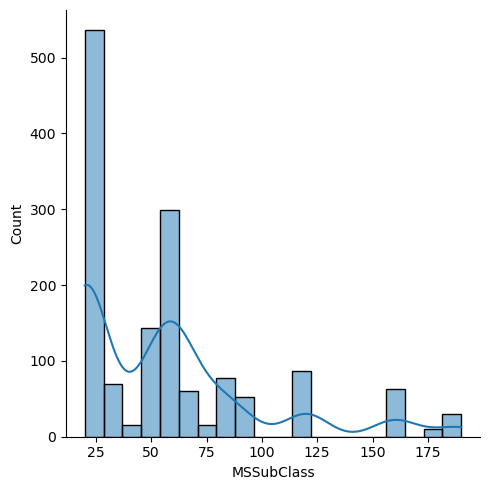

In [19]:
sns.displot(train_df['MSSubClass'], kde=True, kind='hist')

<Axes: ylabel='MSSubClass'>

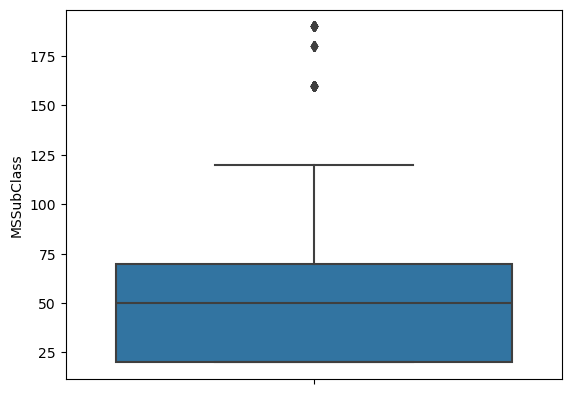

In [24]:
sns.boxplot(data=train_df, y=train_df['MSSubClass'])

In [25]:
train_df.MSSubClass.unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40], dtype=int64)

# **MSZoning**

A coluna MSZoning no dataset representa a classificação de zoneamento do imóvel, ou seja, a designação do uso do solo para a área onde a propriedade está localizada. Aqui estão os valores comuns que você pode encontrar em MSZoning e seus significados:

* A: Agricultura
* C (all): Comercial
* FV: Zona residencial fluvial (próxima a áreas de água)
* I: Industrial
* RH: Alta densidade residencial
* RL: Baixa densidade residencial
* RP: Planejamento residencial
* RM: Média densidade residencial

In [29]:
train_df.MSZoning.head(10)

0    RL
1    RL
2    RL
3    RL
4    RL
5    RL
6    RL
7    RL
8    RM
9    RL
Name: MSZoning, dtype: object

In [28]:
train_df.MSZoning.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: MSZoning
Non-Null Count  Dtype 
--------------  ----- 
1460 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB


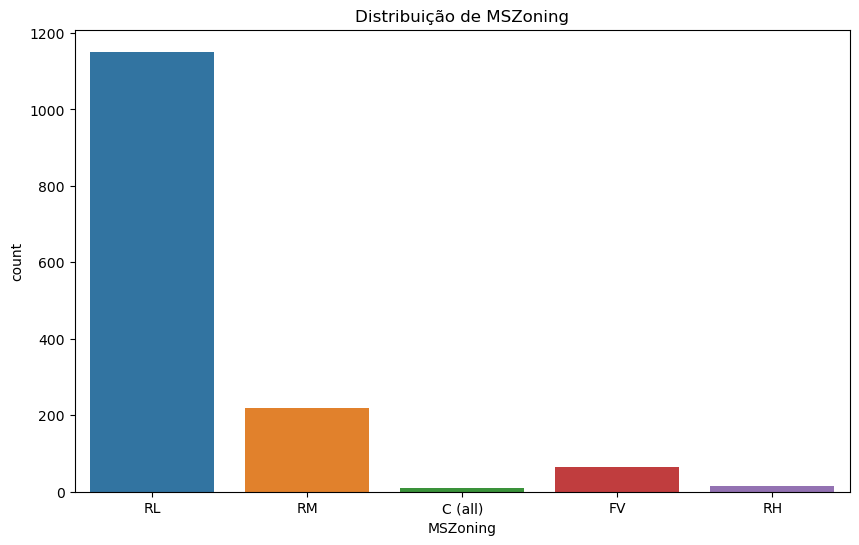

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(x='MSZoning', data=train_df)
plt.title('Distribuição de MSZoning')
plt.show()

In [31]:
train_df.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [32]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# **LotFrontage**

A coluna LotFrontage no dataset refere-se à largura da frente do lote, ou seja, o comprimento da parte da propriedade que está diretamente conectada à rua, medido em pés lineares (linear feet). Em outras palavras, é a medida da frente do terreno, a parte que faz fronteira com a rua.

Esse valor pode ser um indicador do tamanho do terreno e, em alguns casos, pode afetar o valor da propriedade.

In [34]:
train_df.LotFrontage.head()

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64

In [35]:
train_df.LotFrontage.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: LotFrontage
Non-Null Count  Dtype  
--------------  -----  
1201 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


In [42]:
print(f'Dados faltantes: {train_df.LotFrontage.isnull().sum()}')

Dados faltantes: 259


c:\Users\jherfson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x600 with 0 Axes>

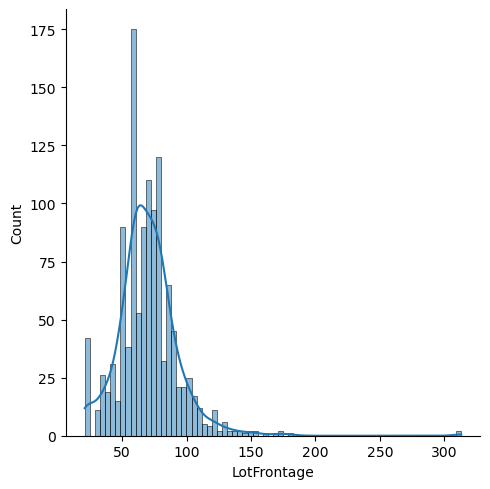

In [38]:
plt.figure(figsize=(10, 6))
sns.displot(train_df['LotFrontage'], kde=True, kind='hist')
plt.show()


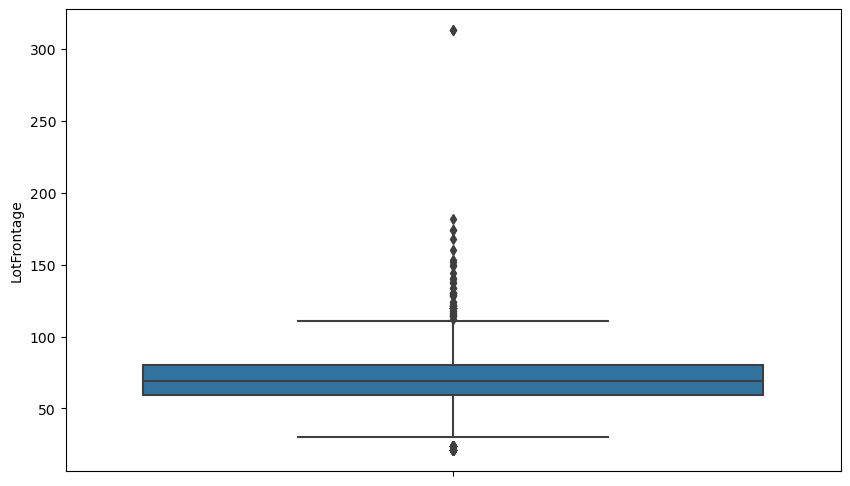

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df, y='LotFrontage')
plt.show()

In [43]:
train_df.LotFrontage.unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

# **LotArea**
A coluna LotArea no dataset representa a área total do lote em pés quadrados (square feet). Ou seja, ela indica o tamanho total do terreno onde a propriedade está localizada. Esse valor inclui toda a área do lote, não apenas a área construída. Quanto maior o valor em LotArea, maior é o terreno da propriedade.

Esse atributo é importante porque o tamanho do lote geralmente influencia o valor da propriedade e sua classificação dentro do mercado imobiliário.

In [45]:
train_df.LotArea.head()

0     8450
1     9600
2    11250
3     9550
4    14260
Name: LotArea, dtype: int64

In [46]:
train_df.LotArea.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: LotArea
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


c:\Users\jherfson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x600 with 0 Axes>

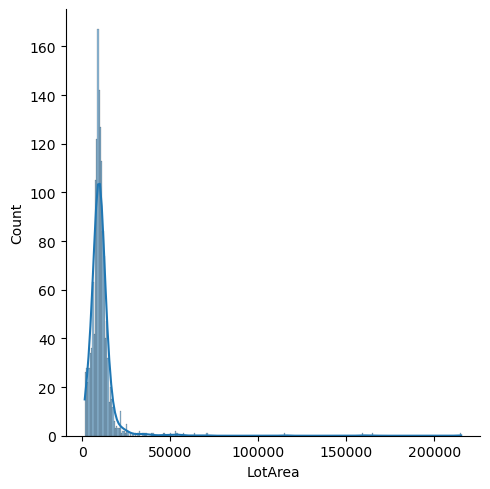

In [47]:
plt.figure(figsize=(10, 6))
sns.displot(train_df['LotArea'], kde=True, kind='hist')
plt.show()

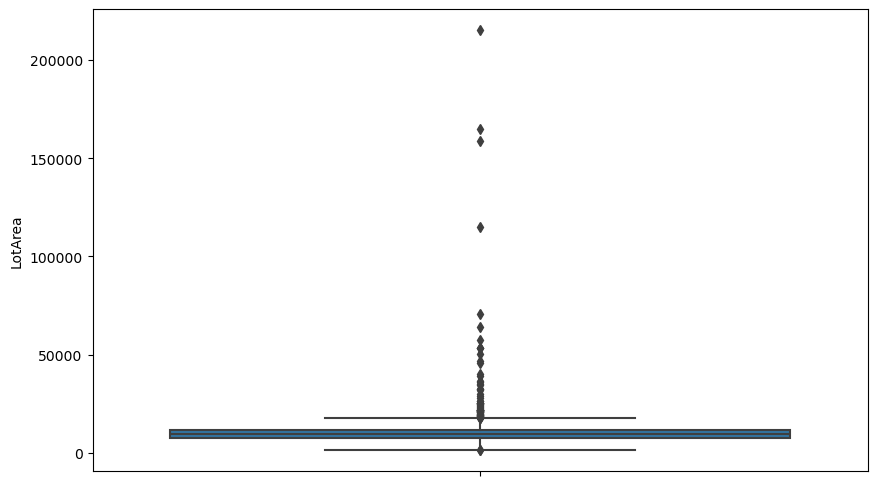

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df, y='LotArea')
plt.show()

# **Street**

A coluna Street no dataset refere-se ao tipo de acesso rodoviário à propriedade. Ela indica a superfície da rua que dá acesso ao imóvel. Os valores comuns em Street são:

    * Pave: Rua pavimentada
    * Grvl: Rua de cascalho

Essa informação ajuda a identificar se a propriedade tem acesso por uma rua asfaltada ou por uma estrada de terra/cascalho, o que pode impactar no valor da propriedade e nas condições de acesso.

In [49]:
train_df.Street.head()

0    Pave
1    Pave
2    Pave
3    Pave
4    Pave
Name: Street, dtype: object

In [50]:
train_df.Street.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: Street
Non-Null Count  Dtype 
--------------  ----- 
1460 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB


In [51]:
train_df.Street.unique()

array(['Pave', 'Grvl'], dtype=object)

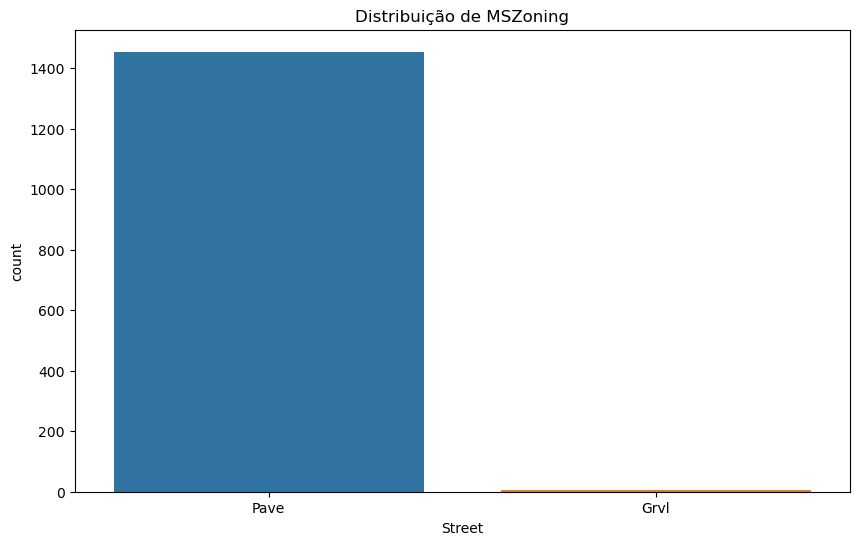

In [52]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Street', data=train_df)
plt.title('Distribuição de MSZoning')
plt.show()